In [1]:
import torch
import matplotlib.pylab as plt
import matplotlib.patches as patches
import numpy as np
from mydataset import MyDataset2

In [2]:
data_dir = '/data/stardust/easy_ViTPose/NTU_DATASET_KP/'
dataset = MyDataset2(data_dir=data_dir)

In [3]:
len(dataset)

69624

In [11]:
dataset.action_dir_dic.keys()

dict_keys(['A029', 'A030', 'A092', 'A047', 'A082', 'A077', 'A032', 'A024', 'A003', 'A034', 'A079', 'A073', 'A033', 'A018', 'A044', 'A031', 'A068', 'A087', 'A041', 'A005', 'A064', 'A094', 'A046', 'A011', 'A088', 'A090', 'A075', 'A010', 'A037', 'A089', 'A017', 'A016', 'A105', 'A013', 'A084', 'A019', 'A042', 'A006', 'A021', 'A062', 'A061', 'A069', 'A066', 'A002', 'A045', 'A074', 'A083', 'A076', 'A071', 'A103', 'A078', 'A093', 'A025', 'A028', 'A065', 'A091', 'A072', 'A001', 'A063', 'A043', 'A004', 'A049', 'A085', 'A081', 'A012', 'A020', 'A086', 'A067', 'A036', 'A038', 'A014', 'A070', 'A015'])

In [4]:
dataset.all_data_dir_list[0], dataset.all_data_dir_list[90], dataset.all_data_dir_list[10201]

('/data/stardust/easy_ViTPose/NTU_DATASET_KP/A029_KP/S013C001P025R002A029_rgb_kp.json',
 '/data/stardust/easy_ViTPose/NTU_DATASET_KP/A029_KP/S015C002P017R002A029_rgb_kp.json',
 '/data/stardust/easy_ViTPose/NTU_DATASET_KP/A079_KP/S020C003P043R002A079_rgb_kp.json')

In [5]:
data_item = dataset[10201]
data_item.keys()

dict_keys(['anchor_c0', 'anchor_aug_c0', 'semi_positives_c0', 'anchor_c1', 'anchor_aug_c1', 'semi_positives_c1', 'anchor_c2', 'anchor_aug_c2', 'semi_positives_c2', 'anchor_c3', 'anchor_aug_c3', 'semi_positives_c3', 'anchor_c4', 'anchor_aug_c4', 'semi_positives_c4'])

In [6]:
for i in range(5):
    print(f"anchor_c{i}", data_item[f"anchor_c{i}"].shape)
    print(f"anchor_aug_c{i}", data_item[f"anchor_aug_c{i}"].shape)
    print(f"semi_positives_c{i}", data_item[f"semi_positives_c{i}"].shape)

anchor_c0 torch.Size([1, 23, 12])
anchor_aug_c0 torch.Size([1, 20, 12])
semi_positives_c0 torch.Size([10, 23, 12])
anchor_c1 torch.Size([1, 23, 4])
anchor_aug_c1 torch.Size([1, 20, 4])
semi_positives_c1 torch.Size([10, 23, 4])
anchor_c2 torch.Size([1, 23, 4])
anchor_aug_c2 torch.Size([1, 20, 4])
semi_positives_c2 torch.Size([10, 23, 4])
anchor_c3 torch.Size([1, 23, 4])
anchor_aug_c3 torch.Size([1, 20, 4])
semi_positives_c3 torch.Size([10, 23, 4])
anchor_c4 torch.Size([1, 23, 4])
anchor_aug_c4 torch.Size([1, 20, 4])
semi_positives_c4 torch.Size([10, 23, 4])


In [7]:
def visualize_keypoint(c0, c1, c2, c3, c4):
    _, K, D = c0.shape

    neck_keypoint = np.array([5.0, 5.0]).reshape(1, 1, 2)
    neck_keypoint = np.tile(neck_keypoint, [1, K, 1])
    
    nose = c0[:, :, :2] + neck_keypoint
    left_shoulder = c0[:, :, 2:4] + neck_keypoint
    right_shoulder = c0[:, :, 4:6] + neck_keypoint
    mid_hip = c0[:, :, 6:8] + neck_keypoint
    left_hip = c0[:, :, 8:10] + mid_hip
    right_hip = c0[:, :, 10:12] + mid_hip

    left_elbow = c1[:, :, 0:2]  + left_shoulder
    left_wrist = c1[:, :, 2:4] + left_elbow

    right_elbow = c2[:, :, 0:2]  + right_shoulder
    right_wrist = c2[:, :, 2:4] + right_elbow

    left_knee = c3[:, :, 0:2] + left_hip
    left_ankle = c3[:, :, 2:4] + left_knee

    right_knee = c4[:, :, 0:2] + right_hip
    right_ankle = c4[:, :, 2:4] + right_knee

    restored_keypoints = np.stack([
        nose,
        neck_keypoint,
        left_shoulder,
        right_ankle,
        mid_hip,
        left_hip,
        right_hip,
        left_elbow,
        left_wrist,
        right_elbow,
        right_wrist,
        left_knee,
        left_ankle,
        right_knee,
        right_ankle
    ], axis=-2)

    print(restored_keypoints.shape)
    print(restored_keypoints.max(), restored_keypoints.min())

    for frame_index in range(restored_keypoints.shape[1]):
        canvas = np.zeros((10, 10))

        fig, ax = plt.subplots(1, 1)
        ax.imshow(canvas)

        for keypoint_index in range(restored_keypoints.shape[2]):
            ax.add_patch(patches.Circle(
                [restored_keypoints[0, frame_index, keypoint_index][1], restored_keypoints[0, frame_index, keypoint_index][0]],
                radius=0.1,
                fill=True,
                color="red"
            ))

        plt.show()

In [8]:
def test(index):
    data_item = dataset[index]
    visualize_keypoint(
        *[data_item[f"anchor_c{i}"] for i in range(5)]
    )

(1, 21, 15, 2)
8.421564728021622 2.77563613653183


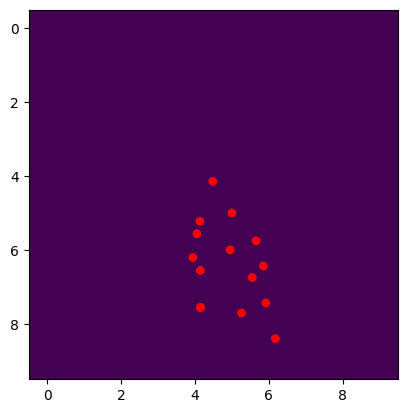

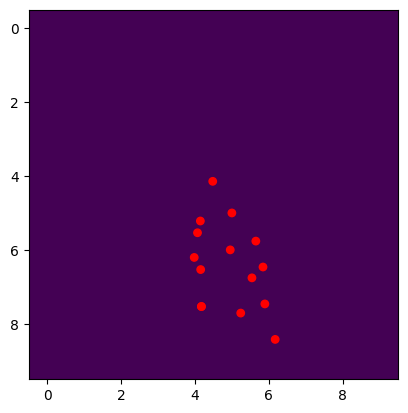

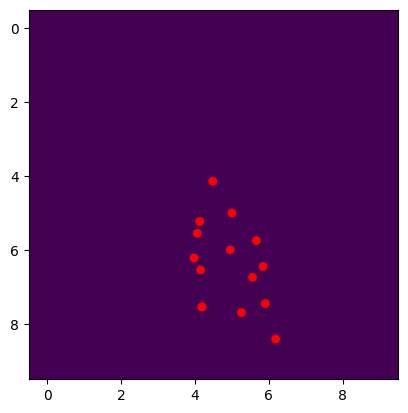

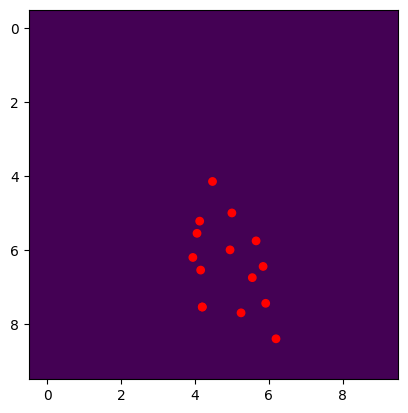

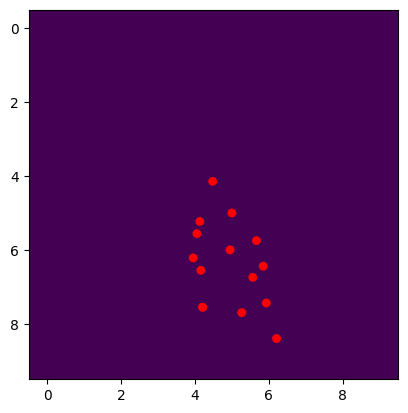

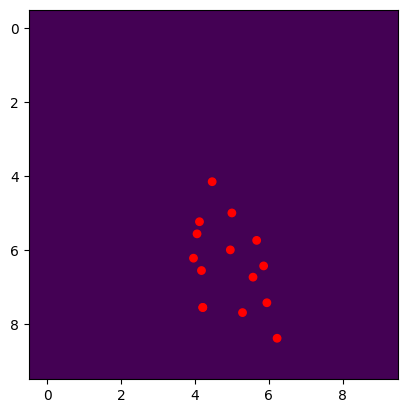

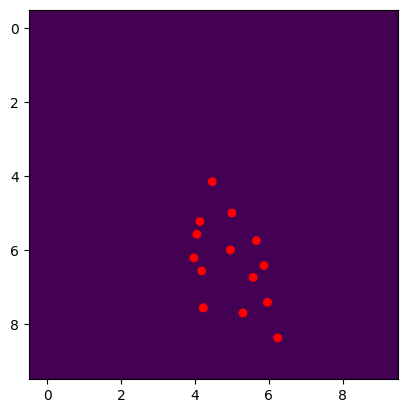

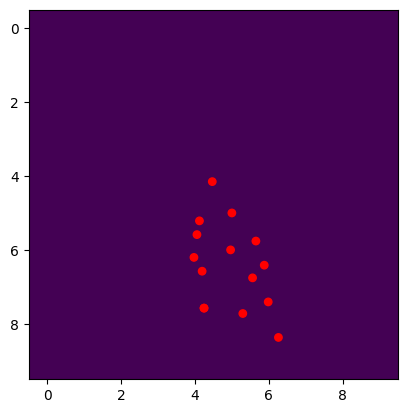

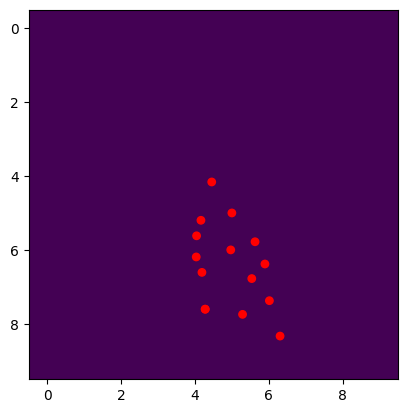

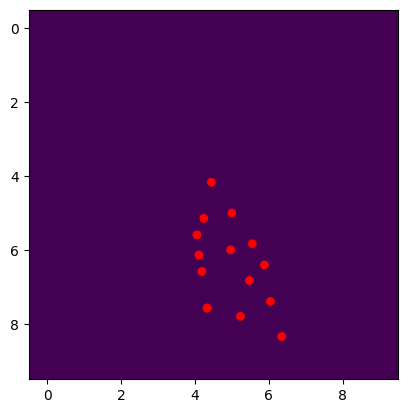

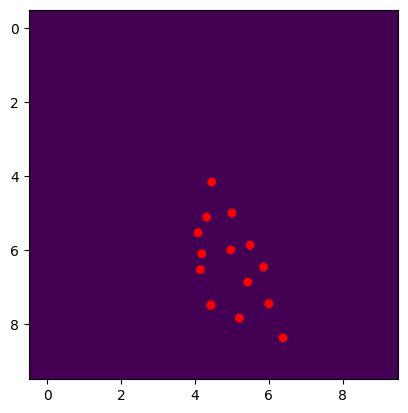

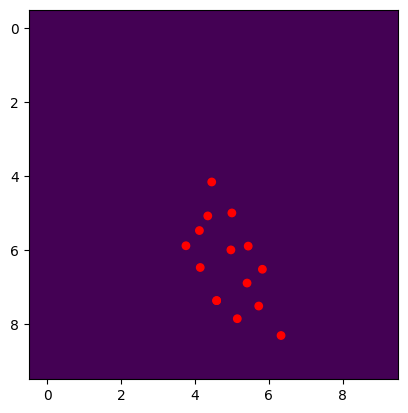

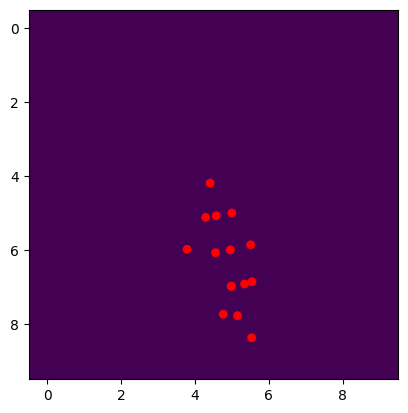

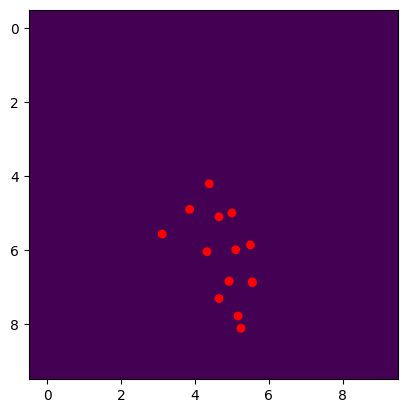

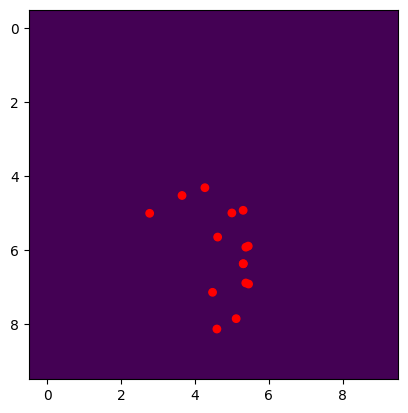

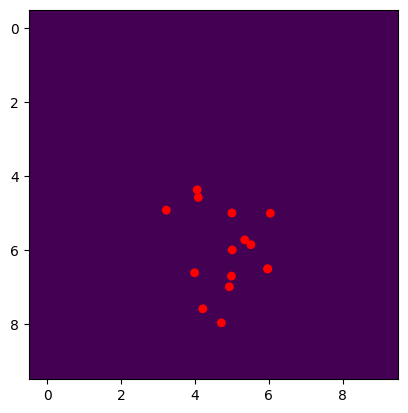

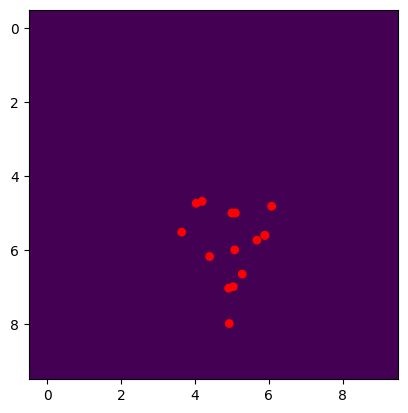

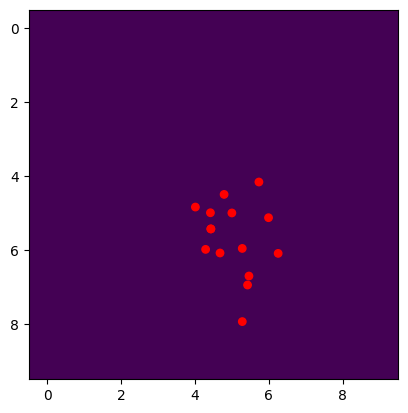

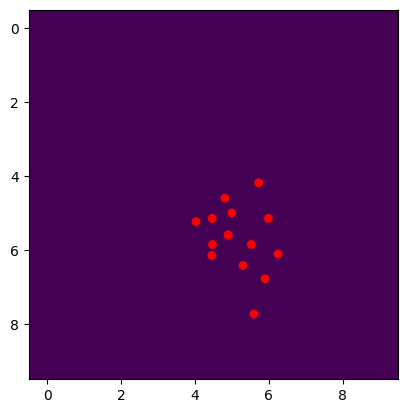

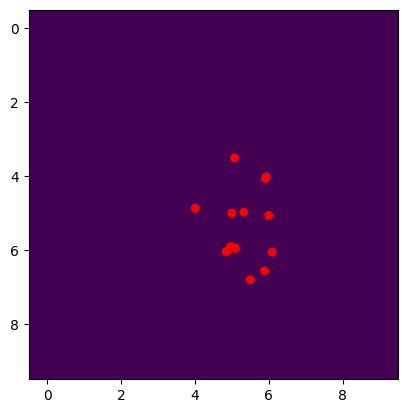

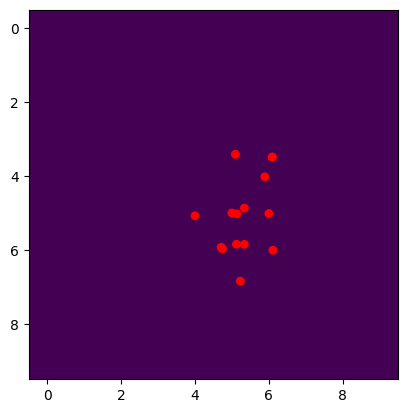

In [9]:
test(56704)

In [5]:
%cd ../

/home/onwood/SBA_project_3D


/home/onwood/anaconda3/envs/bpe/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
import os
for fn in os.listdir('./dataset_zip'):
    path = "dataset/"+fn.split('.')[0]
    os.mkdir(path)

In [ ]:
import os

for fn in os.listdir('dataset_zip'):
    file_name = "dataset_zip/"+fn
    output_dir = "dataset/"+fn.split('.')[0]
    os.system("unzip " + file_name + " -d " + output_dir)

In [1]:
origin_vid_dir = 'dataset/a073_kp/S023C002P061R002A073_rgb_kp.json'

In [2]:
import json
import numpy as np

In [3]:
with open(origin_vid_dir, "r") as f:
    origin_keypoints = json.load(f)

    origin_keypoints_anno = origin_keypoints['annotations']
    origin_tmp_list = []
    for frame_data in origin_keypoints_anno:
        if frame_data:
            keypoints_list = [frame_data[key] for key in frame_data if frame_data[key]]
            if keypoints_list:
                origin_tmp_list.extend(keypoints_list)

In [4]:
print(np.array(origin_tmp_list).shape)

(17, 17, 3)


In [4]:
origin = np.array(origin_tmp_list)

In [8]:
print(origin.shape)

(17, 17, 3)


In [9]:
origin = origin[:,:,[0,1]]
print(origin.shape)

(17, 17, 2)


In [10]:
print(origin)

[[[ 464.27133179 1054.18237305]
  [ 453.13839722 1064.28466797]
  [ 454.06140137 1042.2434082 ]
  [ 449.59356689 1075.79736328]
  [ 452.46011353 1024.84289551]
  [ 496.1133728  1097.62097168]
  [ 497.24298096 1004.34588623]
  [ 568.7052002  1120.79321289]
  [ 564.07806396  991.09179688]
  [ 625.19787598 1088.10339355]
  [ 616.68304443 1006.70684814]
  [ 627.07653809 1088.53100586]
  [ 627.38214111 1025.10717773]
  [ 715.87353516 1078.75952148]
  [ 712.49902344 1019.36828613]
  [ 797.23657227 1069.0012207 ]
  [ 793.08459473 1009.62402344]]

 [[ 463.6802063  1053.35742188]
  [ 451.97079468 1063.76550293]
  [ 452.53851318 1041.52148438]
  [ 449.03417969 1075.45385742]
  [ 451.42282104 1024.30566406]
  [ 495.95126343 1097.34521484]
  [ 497.46710205 1004.2121582 ]
  [ 570.79852295 1118.0390625 ]
  [ 564.65795898  991.08496094]
  [ 626.74139404 1086.11010742]
  [ 616.29406738 1006.90441895]
  [ 627.70593262 1089.25024414]
  [ 628.00048828 1025.95068359]
  [ 717.32562256 1079.26928711]
  [ 71

In [7]:
print(origin.min())

-3.1629104614257812


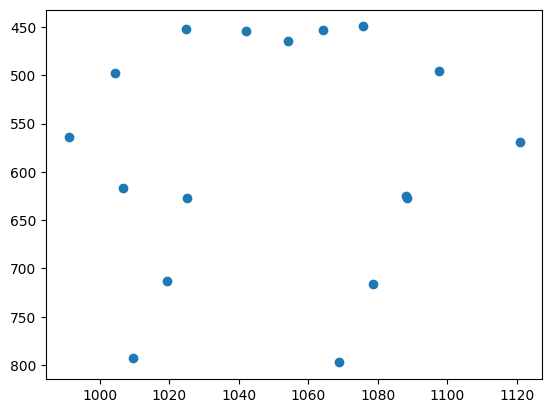

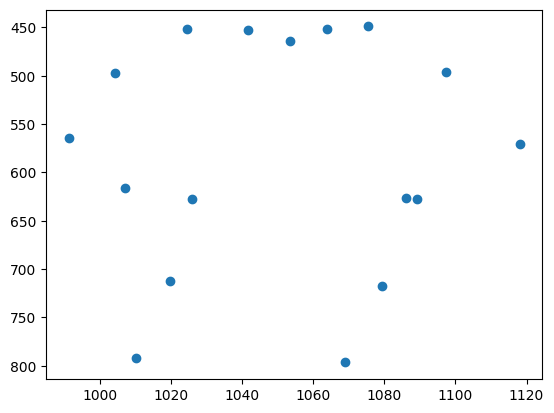

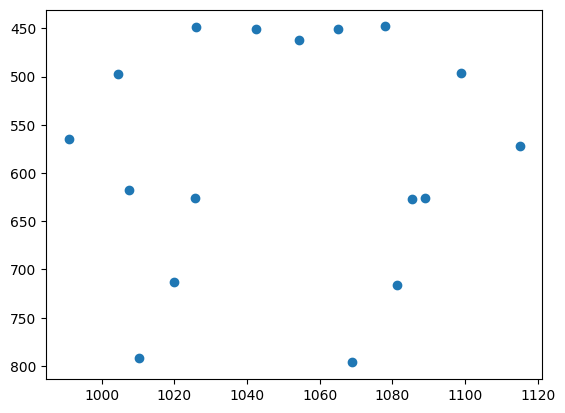

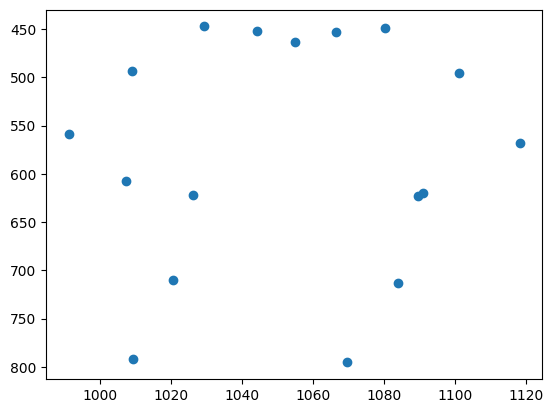

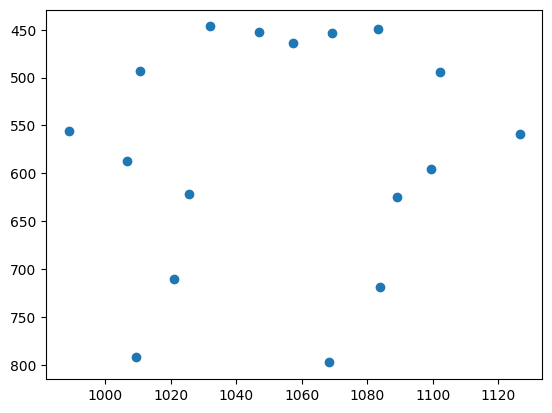

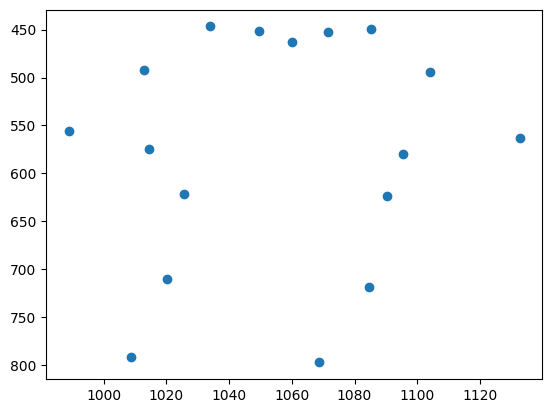

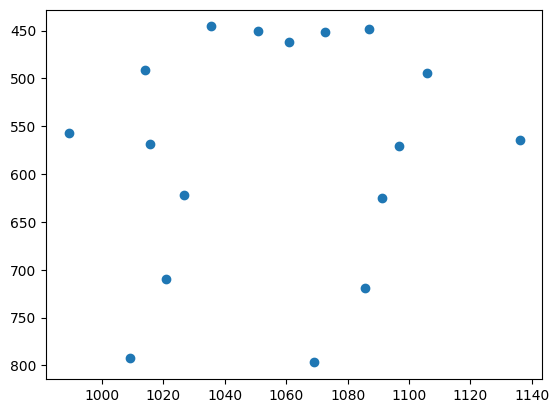

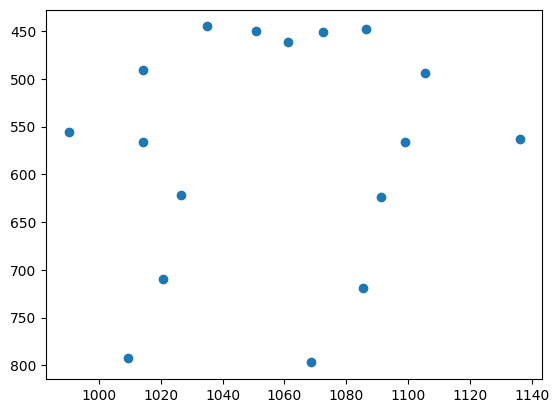

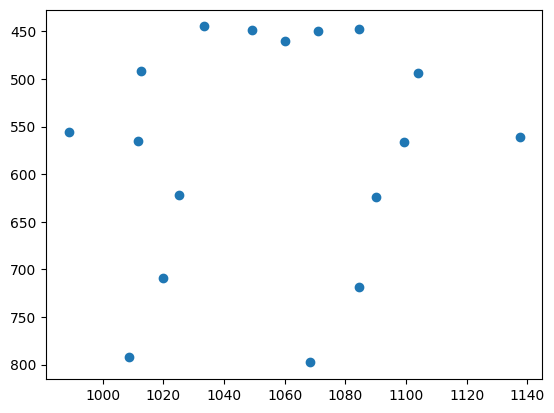

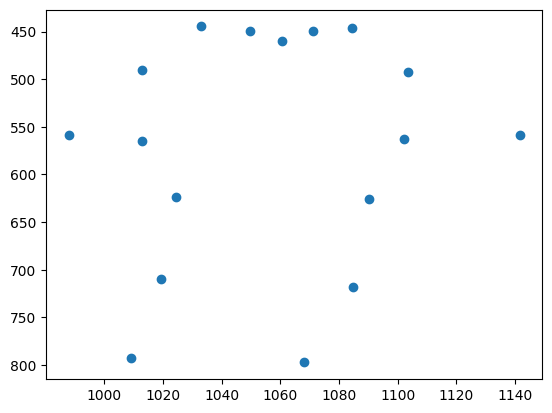

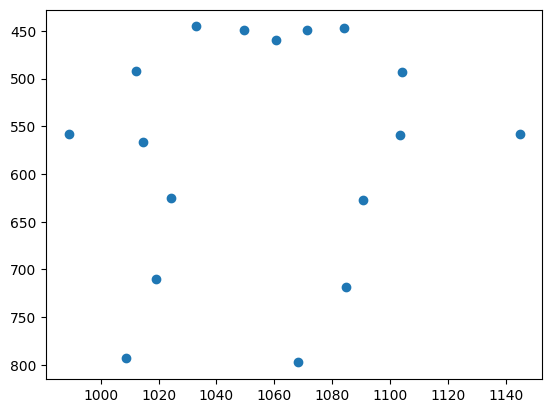

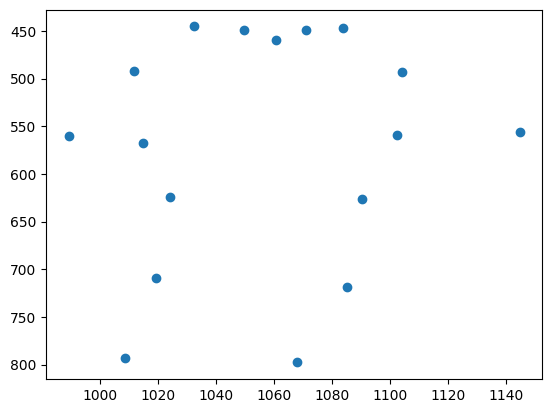

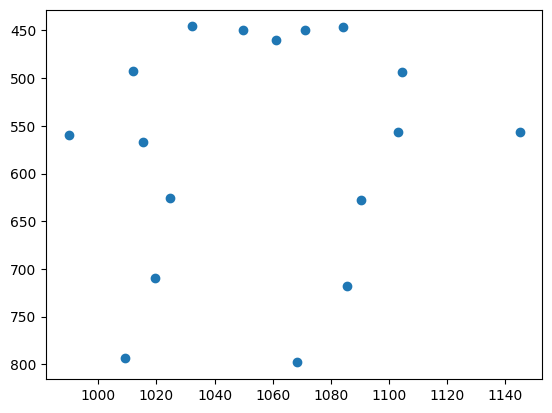

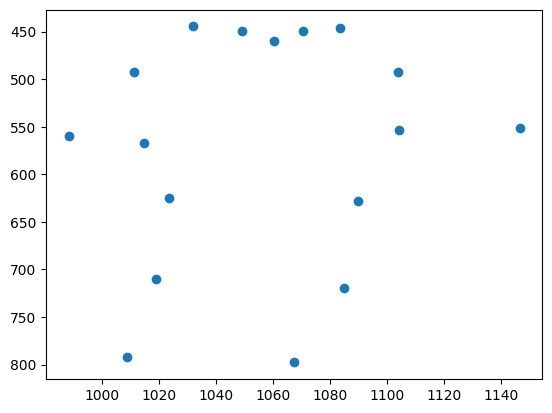

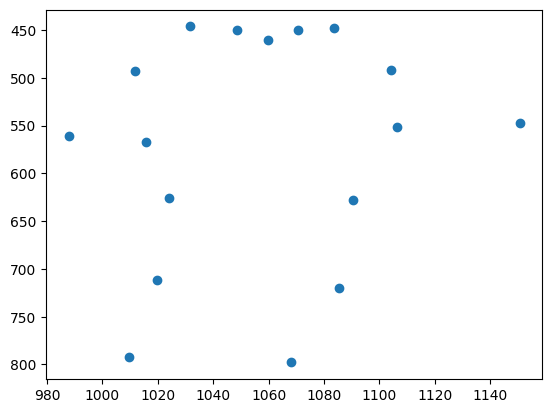

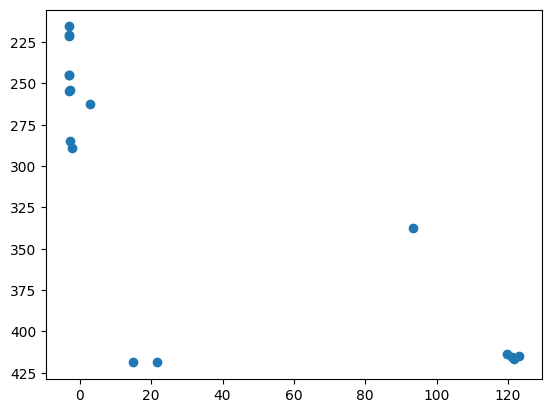

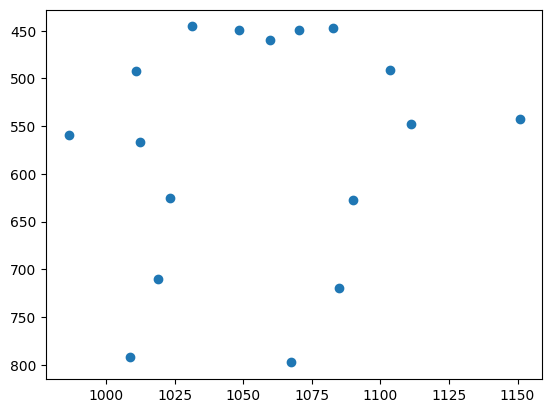

In [22]:
import matplotlib.pyplot as plt
for i in range(len(origin)):
    x = origin[i][:,1]
    y = origin[i][:,0]
    plt.subplots(1,1)
    plt.gca().invert_yaxis()
    plt.scatter(x, y)
    
    # plt.imshow()

In [2]:
import os
import json
import pathlib
import shutil
import numpy as np

data_dir = 'dataset'

all_data_dir_list = []
for file_path in pathlib.Path(data_dir).glob("*/*.json"):
    all_data_dir_list.append(str(file_path))

for origin_vid_dir in all_data_dir_list:

    with open(origin_vid_dir, "r") as f:
        origin_keypoints = json.load(f)
        origin_keypoints_anno = origin_keypoints['annotations']

        origin_tmp_list = []
        for frame_data in origin_keypoints_anno:
            if frame_data:
                keypoints_list = [frame_data[key] for key in frame_data if frame_data[key]]
                if keypoints_list:
                    origin_tmp_list.extend(keypoints_list)
        try:
            origin_anchor_keypoints = np.array(origin_tmp_list)[:,:,[0,1]]
            origin_x_max = np.max(origin_anchor_keypoints[:,:,0])
            origin_y_max = int(np.max(origin_anchor_keypoints[:,:,1]))
            origin_x_min = np.min(origin_anchor_keypoints[:,:,0])
            origin_y_min = int(np.min(origin_anchor_keypoints[:,:,1]))
            if (origin_y_min <= 0) or (origin_x_min <= 0) or (origin_y_max <= 0) or (origin_x_max <= 0):
            # if origin_y_min - 25 == origin_y_max + 25:
                print("fn: ", origin_vid_dir)
                output = 'error_data/' + origin_vid_dir.split('/')[-1]
                shutil.move(origin_vid_dir, output)
                print(origin_x_max, origin_x_min, origin_y_max, origin_y_min)
        except IndexError:
            print("error_fn: ", origin_vid_dir)
            shutil.move(origin_vid_dir, output)


fn:  dataset/a073_kp/S023C002P061R002A073_rgb_kp.json
798.014892578125 215.601806640625 1150 -3
fn:  dataset/a073_kp/S023C002P062R002A073_rgb_kp.json
738.6761474609375 216.29232788085938 1113 -3
fn:  dataset/a073_kp/S023C002P067R002A073_rgb_kp.json
825.4073486328125 206.67286682128906 1100 -4
fn:  dataset/a073_kp/S020C003P054R001A073_rgb_kp.json
1070.7236328125 455.9350280761719 1162 0
fn:  dataset/a073_kp/S023C002P062R001A073_rgb_kp.json
706.0 207.09193420410156 1108 -5
fn:  dataset/a086_kp/S023C002P061R002A086_rgb_kp.json
801.4127197265625 223.53402709960938 1157 -2
fn:  dataset/a086_kp/S023C002P067R001A086_rgb_kp.json
764.6317138671875 205.22219848632812 1009 -5
fn:  dataset/a086_kp/S023C002P062R001A086_rgb_kp.json
730.5682373046875 206.52862548828125 1198 -5
fn:  dataset/a086_kp/S023C002P062R002A086_rgb_kp.json
766.8748779296875 204.43418884277344 1124 -3
fn:  dataset/a086_kp/S023C002P061R001A086_rgb_kp.json
821.4765625 212.36404418945312 1095 -1
fn:  dataset/a046_kp/S003C002P019R0